# Classification Example using IRIS Plants Dataset

## How can classify Iris flowers from factual metrics?



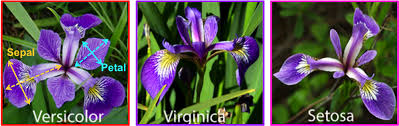

In [1]:
# Let's load required lib's
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings("ignore")
import os
os.environ['OMP_NUM_THREADS'] = '8'

In [2]:
# Let's load our dataset
data = load_iris()

X = data.data
y = data.target

print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

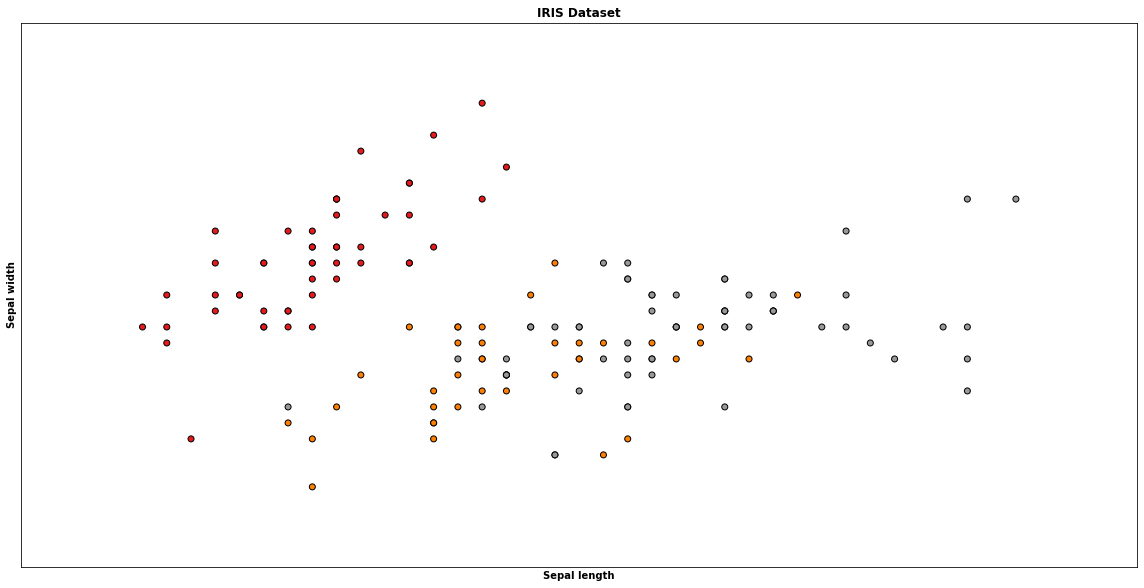

In [3]:
# Now we display the classes for the 2 first features (sepal related)
# We can't display the 4 features since 4D is not possible...
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(20, 10));
plt.clf();

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,edgecolor='k');
plt.xlabel('Sepal length',fontweight='bold');
plt.ylabel('Sepal width', fontweight='bold');
plt.title('IRIS Dataset',fontweight='bold');
plt.xlim(x_min, x_max);
plt.ylim(y_min, y_max);
plt.xticks(());
plt.yticks(());

In [4]:
# Let's pick few models with default parameters, simply train them and 
# keep related training scores to compare them...
classifiers = [
    linear_model.RidgeCV(),
    linear_model.Lasso(),
    KNeighborsClassifier(),
    SVC(),
    GaussianProcessClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MLPClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

names = ["Ridge","Lasso","Nearest Neighbors", "Linear SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X, y)
    scores.append(round(clf.score(X, y),2))

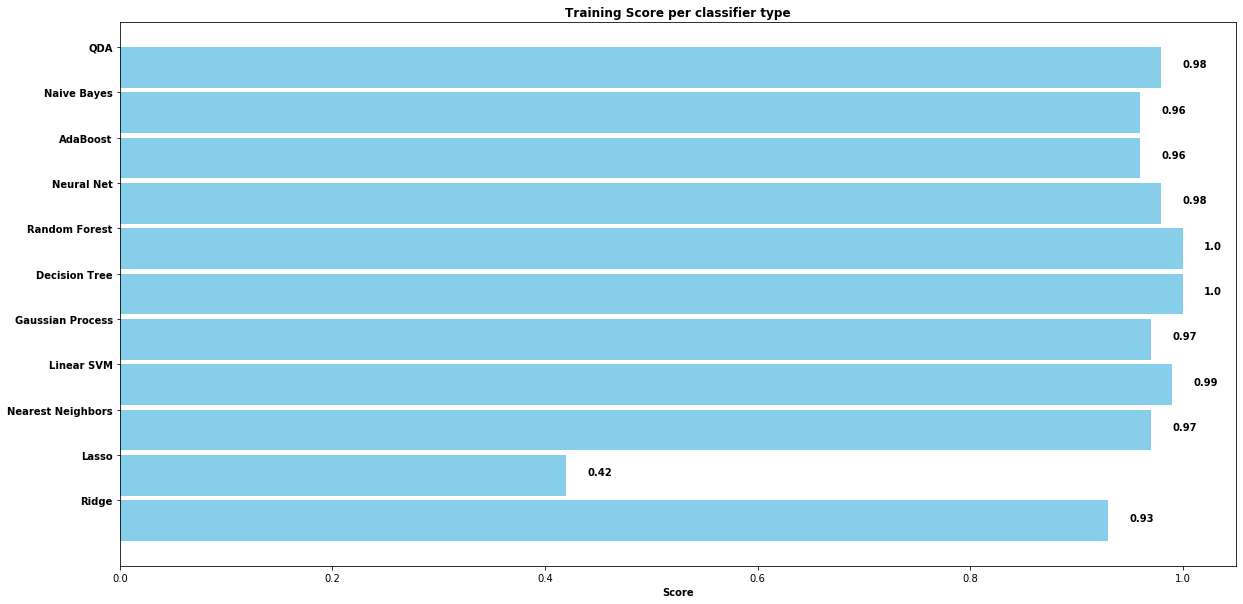

In [5]:
# Let's put result in a comprehensive graph.
# Here we use accuracy to score the models predicitions.
fig, ax = plt.subplots(figsize=(20, 10))
width = .9
ind = np.arange(len(scores))  
ax.barh(ind, scores, width, color="skyblue");
ax.set_yticks(ind+width/2);
ax.set_yticklabels(names, minor=False,fontweight='bold');
for i, v in enumerate(scores):
    ax.text(v +.02 , i , str(v), fontweight='bold');
plt.title('Training Score per classifier type',fontweight='bold');
plt.xlabel('Score',fontweight='bold');      

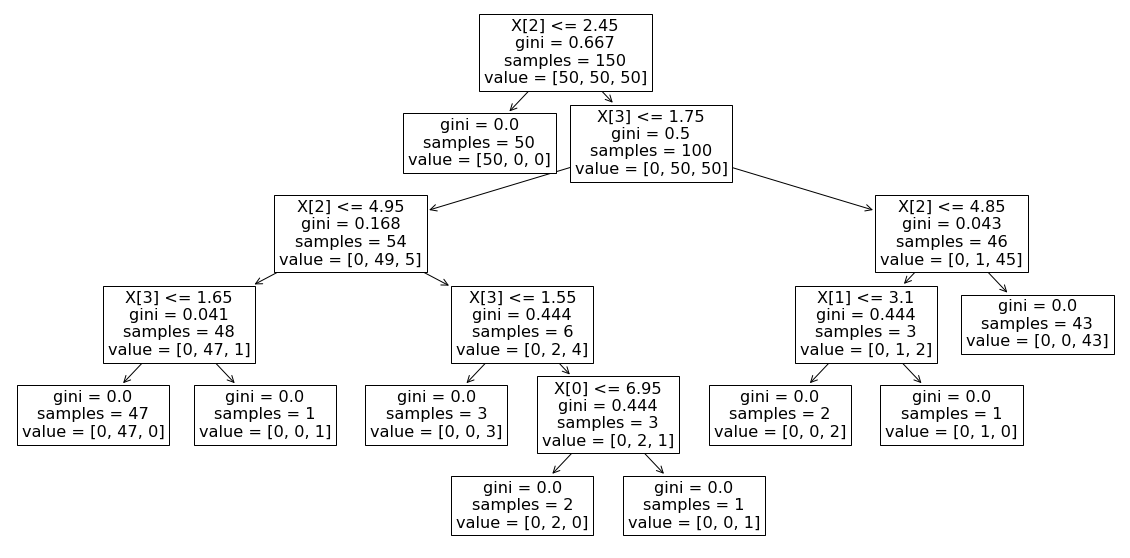

In [6]:
# Let's explore the decision tree model structure since it's one of the best classifier in this case...
# X[0] = sepal length in cm
# X[1] = sepal width in cm 
# X[2] = petal length in cm 
# X[3] = petal width in cm
# value list contains Iris classes 
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
fig, ax = plt.subplots(figsize=(20, 10))
tree.plot_tree(clf.fit(X,y));